In [1]:
%pip install -r requirements.txt
%reload_ext autoreload

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-2t4qow8n
  Running command git clone -q https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-2t4qow8n
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=5ec9ed988b73ed405bba42a9b882f0c36b06bb49979beddbe6f2f721dfdd5bae
  Stored in directory: /tmp/pip-ephem-wheel-cache-ereujbmi/wheels/b0/7e/40/20f0b1e23280cc4a66dc8009c29f42cb4afc1b205bc5814786
Successfully built segment-anything
Note: you may need to restart the kernel to use updated packages.


(624, 351, 3)


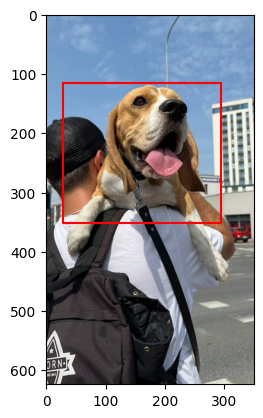

In [19]:
# get a test image dog.png as a numpy array
import numpy as np
import matplotlib.pyplot as plt
image = plt.imread('dog.png')
# remove the alpha channel
image = image[:,:,:3]
print(image.shape)
box = np.array([28, 115, 295, 351])
plt.imshow(image)
plt.plot([box[0], box[2], box[2], box[0], box[0]], [box[1], box[1], box[3], box[3], box[1]], 'r')
plt.show()


In [12]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/nfs/turbo/coe-chaijy-unreplicated/datasets/SAM/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

In [20]:
predictor.set_image(image)
masks, scores, logits = predictor.predict(box=box, multimask_output=True)

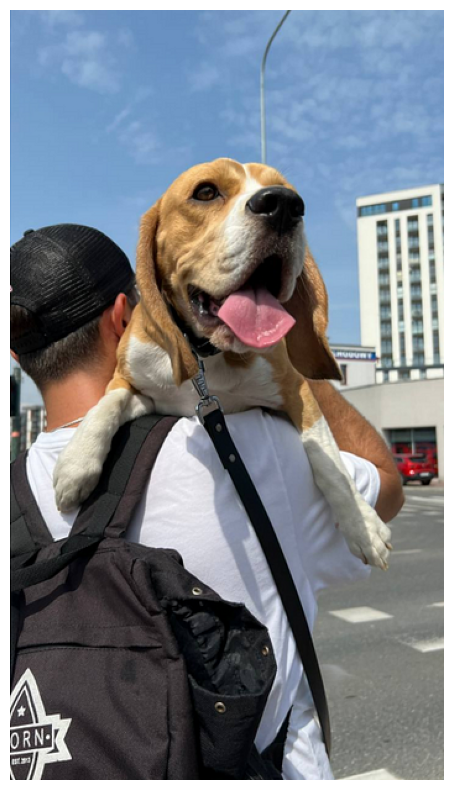

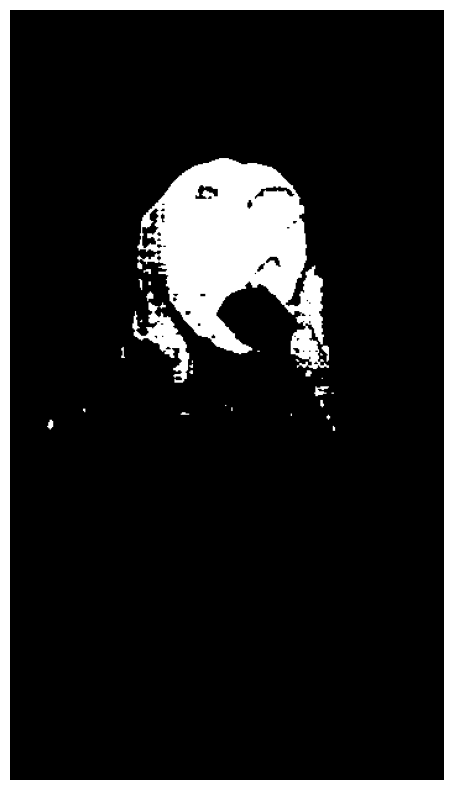

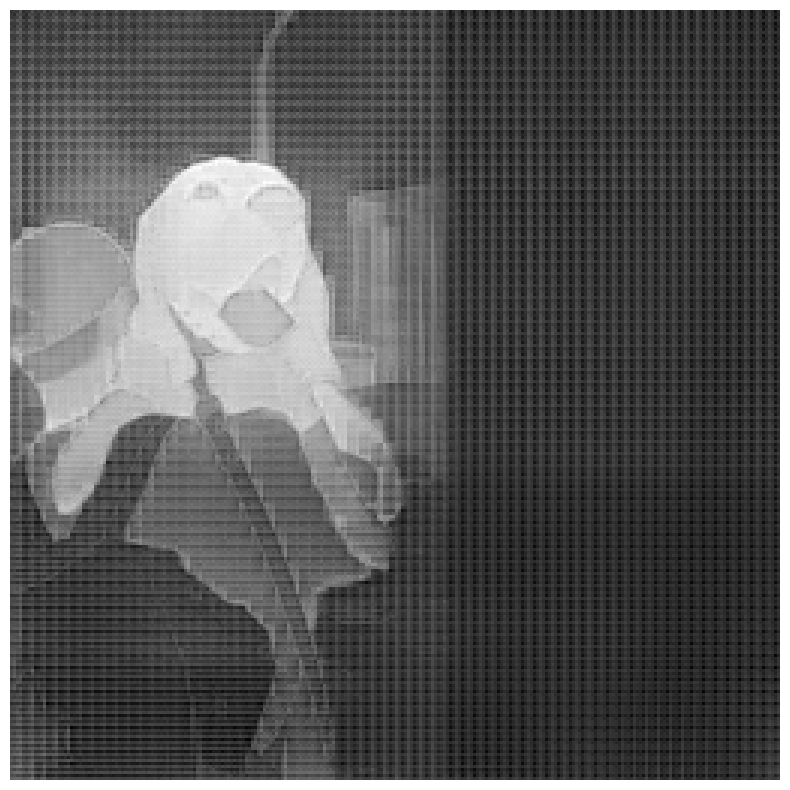

[0.683129  0.9318204 0.9607488]
(3, 624, 351) bool False True
(3, 256, 256) float32 -47.161114 14.964445


In [21]:
# visualize the result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(masks[0], cmap="gray")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(logits[0], cmap="gray")
plt.axis("off")
plt.show()

print(scores)
print(masks.shape, masks.dtype, masks.min(), masks.max())
print(logits.shape, logits.dtype, logits.min(), logits.max())
